In [3]:
import pymysql

import os
import pandas as pd
import scipy.optimize as opt

from draw_effici import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

ModuleNotFoundError: No module named 'pymysql'

In [2]:
# 打开数据库连接
db = pymysql.connect(host='47.95.112.122',
                     user='root',
                     password='root',
                     database='clouddatabase')

# 使用 cursor() 方法创建一个游标对象 cursor
cur = db.cursor()

# 获取全部列名
sql_code = "select * from Production_Daily_Data_pcponly LIMIT 1"
cur.execute(sql_code)

# 列名列表
column_list = [i[0] for i in cur.description]
for i in column_list:
    # print(i)
    pass

OperationalError: (1049, "Unknown database 'clouddatabase'")

In [3]:
save_dir = '../../data/macro_control_chart'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

focus_well = 'NB2'
focus_day = '2020-12-27'
focus_day = str(focus_day).split('T')[0]

In [4]:
sql_code = "select * from Production_Daily_Data_pcponly where `Wellbore` = '%s'" % focus_well
cur.execute(sql_code)

df = pd.DataFrame(cur.fetchall())

# 修改列名
df.columns = column_list
# 将日期列转化为时间格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')



In [5]:
# xy计算规则

# 第一版 无因次举升压头=[泵效 + (油管压力 - 套管压力)*10] / max(FL from Surface)
# x_data = (df['Efficiency %'] + (df['TP_psig'] - df['CP_psig']) * 10) / df['Prod_FL_From_Surface_m'].max()

# 第二版 沉默度/下泵深度
x_data = df['Prod_FL_From_Surface_m'] / df['Depth_m']

# 3D的第二个横坐标，这里用z
PSIA_MPA = 0.0068948
z = df['Prod_BHP_psia'] * PSIA_MPA

# y坐标
y_efficiency = df['Efficiency %']
y_torque = df['Amps_Torq']




time_data = df['Date']
time_data = (time_data - time_data.iloc[0]).dt.days


# 画单井泵效
draw_single_well_efficiency(x_data, y_efficiency, time_data, well_name=focus_well, save_img=save_dir+'/单井泵效控制图')
# 画单井扭矩
draw_single_well_torque(x_data, y_torque, time_data, well_name=focus_well, save_img=save_dir+'/单井扭矩控制图')



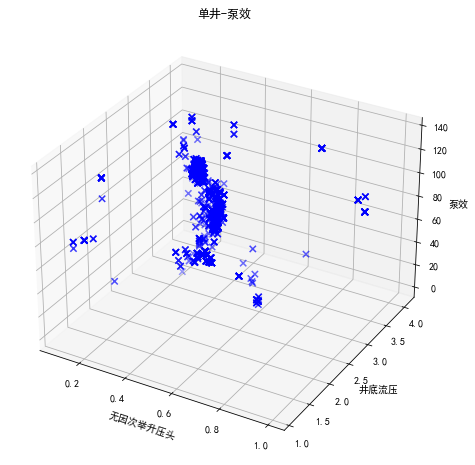

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x_data, z, y_efficiency, marker='x', color='blue', s=40, label='class 1')

plt.title('单井-泵效')
ax.set_xlabel('无因次举升压头')
ax.set_ylabel('井底流压')
ax.set_zlabel('泵效')
 
plt.show()

In [7]:

sql_code = "select * from Production_Daily_Data_pcponly where `Date` = '%s'" % focus_day
cur.execute(sql_code)

df = pd.DataFrame(cur.fetchall())

# 修改列名
df.columns = column_list
# 将日期列转化为时间格式
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


# xy计算规则

# 第一版 无因次举升压头=[泵效 + (油管压力 - 套管压力)*10] / max(FL from Surface)
# x_data = (df['Efficiency %'] + (df['TP_psig'] - df['CP_psig']) * 10) / df['Prod_FL_From_Surface_m'].max()

# 第二版 沉默度/下泵深度
x_data = df['Prod_FL_From_Surface_m'] / df['Depth_m']


# 3D的第二个横坐标，这里用z
PSIA_MPA = 0.0068948
z = df['Prod_BHP_psia'] * PSIA_MPA


# y坐标

y_efficiency = df['Efficiency %']
y_torque = df['Amps_Torq']


# 画井群控制泵效
draw_group_well_efficiency(x_data, y_efficiency, one_day=focus_day, save_img=save_dir+'/井群泵效控制图')
# 画井群控制扭矩
draw_group_well_torque(x_data, y_torque, one_day=focus_day, save_img=save_dir+'/井群扭矩控制图')


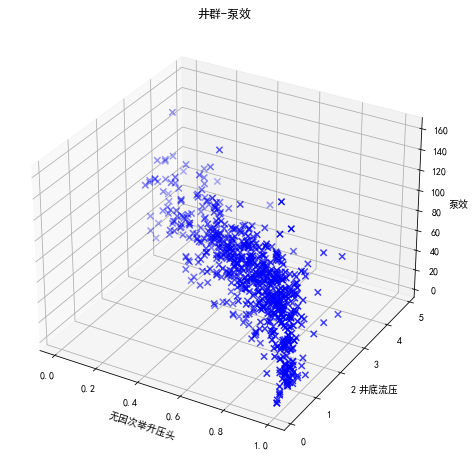

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x_data, z, y_efficiency, marker='x', color='blue', s=40, label='class 1')

plt.title('井群-泵效')
ax.set_xlabel('无因次举升压头')
ax.set_ylabel('井底流压')
ax.set_zlabel('泵效')
 
plt.show()